In [72]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

Pick either to import FALL or SPRING data

In [117]:
### FALL IMPORT DATA TO PLOT
# pick me
season = 'fall'
import pandas
colnames = ['maxVmag_counts','maxVmag_g', 'xValue_counts' ,'yValue_counts' ,'zValue_counts' ,'xValue_g' , 'yValue_g' ,'zValue_g' , 'maxVmagTime' , 'meanVmag_counts' , 'meanVmag_g' , 'sta' , 'staIndex' , 'startTimeFile']

# Get the Fall Data and skip the first row
data = pandas.read_csv('./fallClean/Magnitude/fa_vmag.csv', names=colnames, header = 0)


In [119]:
### SPRING IMPORT DATA TO PLOT
# or pick me
season = 'spring'
import pandas
colnames = ['maxVmag_counts','maxVmag_g', 'xValue_counts' ,'yValue_counts' ,'zValue_counts' ,'xValue_g' , 'yValue_g' ,'zValue_g' , 'maxVmagTime' , 'meanVmag_counts' , 'meanVmag_g' , 'sta' , 'staIndex' , 'startTimeFile']

# Get the Spring Data and skip the first row
data = pandas.read_csv('./springClean/Magnitude/sp_vmag.csv', names=colnames, header = 0)

In [120]:
# DEFINE THE INFORMATION FROM THE CVS FILE
# Always run me

# Component Data
xValue_g = data.xValue_g.tolist()
yValue_g = data.yValue_g.tolist()
zValue_g = data.zValue_g.tolist()

# Max Vector Magnitude in g
maxVmag_g = data.maxVmag_g.tolist()

# Times
maxVmagTime = data.maxVmagTime.tolist()

# Time associated with filename
startTimeFile = data.startTimeFile.tolist()

# Stations
sta = data.sta.tolist()

# Station index
staIndex = data.staIndex.tolist()

#print (xValue_g,'x')
#print(len(xValue_g))


what am I plotting?  fall


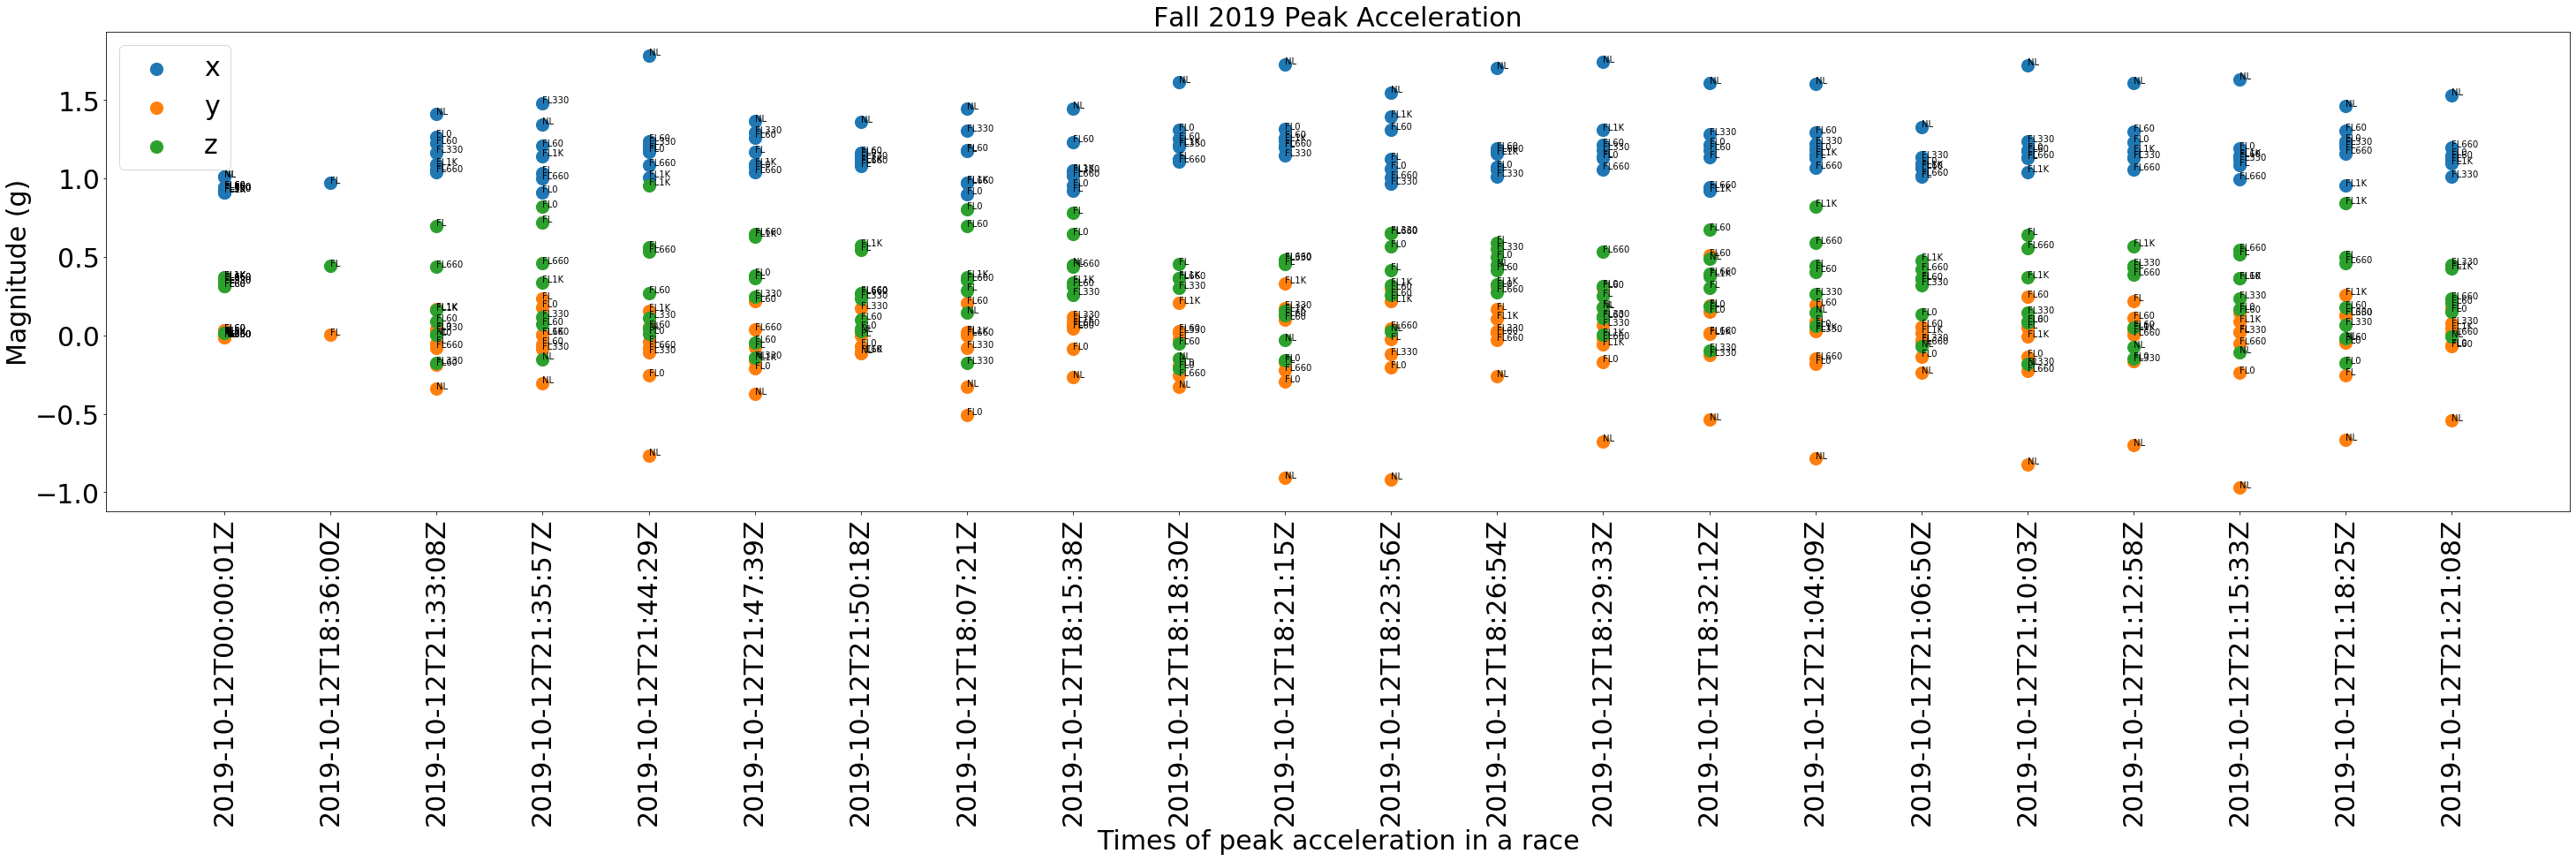

In [113]:
# Plot SCATTER 
# Check graph labels and change for Fall or Spring data uploaded

print('what am I plotting? ', season)

# Create a figure containing a single axes.
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)

# plot a line graph

#x = plt.plot(maxVmagTime, xValue_g)  # Plot some data on the axes.
#y = plt.plot(maxVmagTime, yValue_g)
#z = plt.plot(maxVmagTime, zValue_g)


# Plot a Scatter Plot

# with annotations of station name
x = plt.scatter(startTimeFile, xValue_g, s = 200)  # Plot some data on the axes.
for i, txt in enumerate(sta):
    ax.annotate(txt, (startTimeFile[i], xValue_g[i]))
y = plt.scatter(startTimeFile, yValue_g, s = 200)
for i, txt in enumerate(sta):
    ax.annotate(txt, (startTimeFile[i], yValue_g[i]))  
z = plt.scatter(startTimeFile, zValue_g, s = 200)
for i, txt in enumerate(sta):
    ax.annotate(txt, (startTimeFile[i], zValue_g[i]))

# Labels and Titles

plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
#plt.title("Spring 2019 Peak Acceleration", fontsize = 30)
plt.title("Fall 2019 Peak Acceleration", fontsize = 30)
plt.xlabel('Times of peak acceleration in a race', fontsize = 30)
plt.ylabel('Magnitude (g)', fontsize = 30)
plt.gca().legend(('x','y','z'), fontsize = 30)

    
#Save the Figure

#plt.savefig('./springClean/Magnitude/sp_scatter.png', bbox_inches='tight')
plt.savefig('./fallClean/Magnitude/fa_scatter.png', bbox_inches='tight')

plt.show()

what am I plotting?  spring


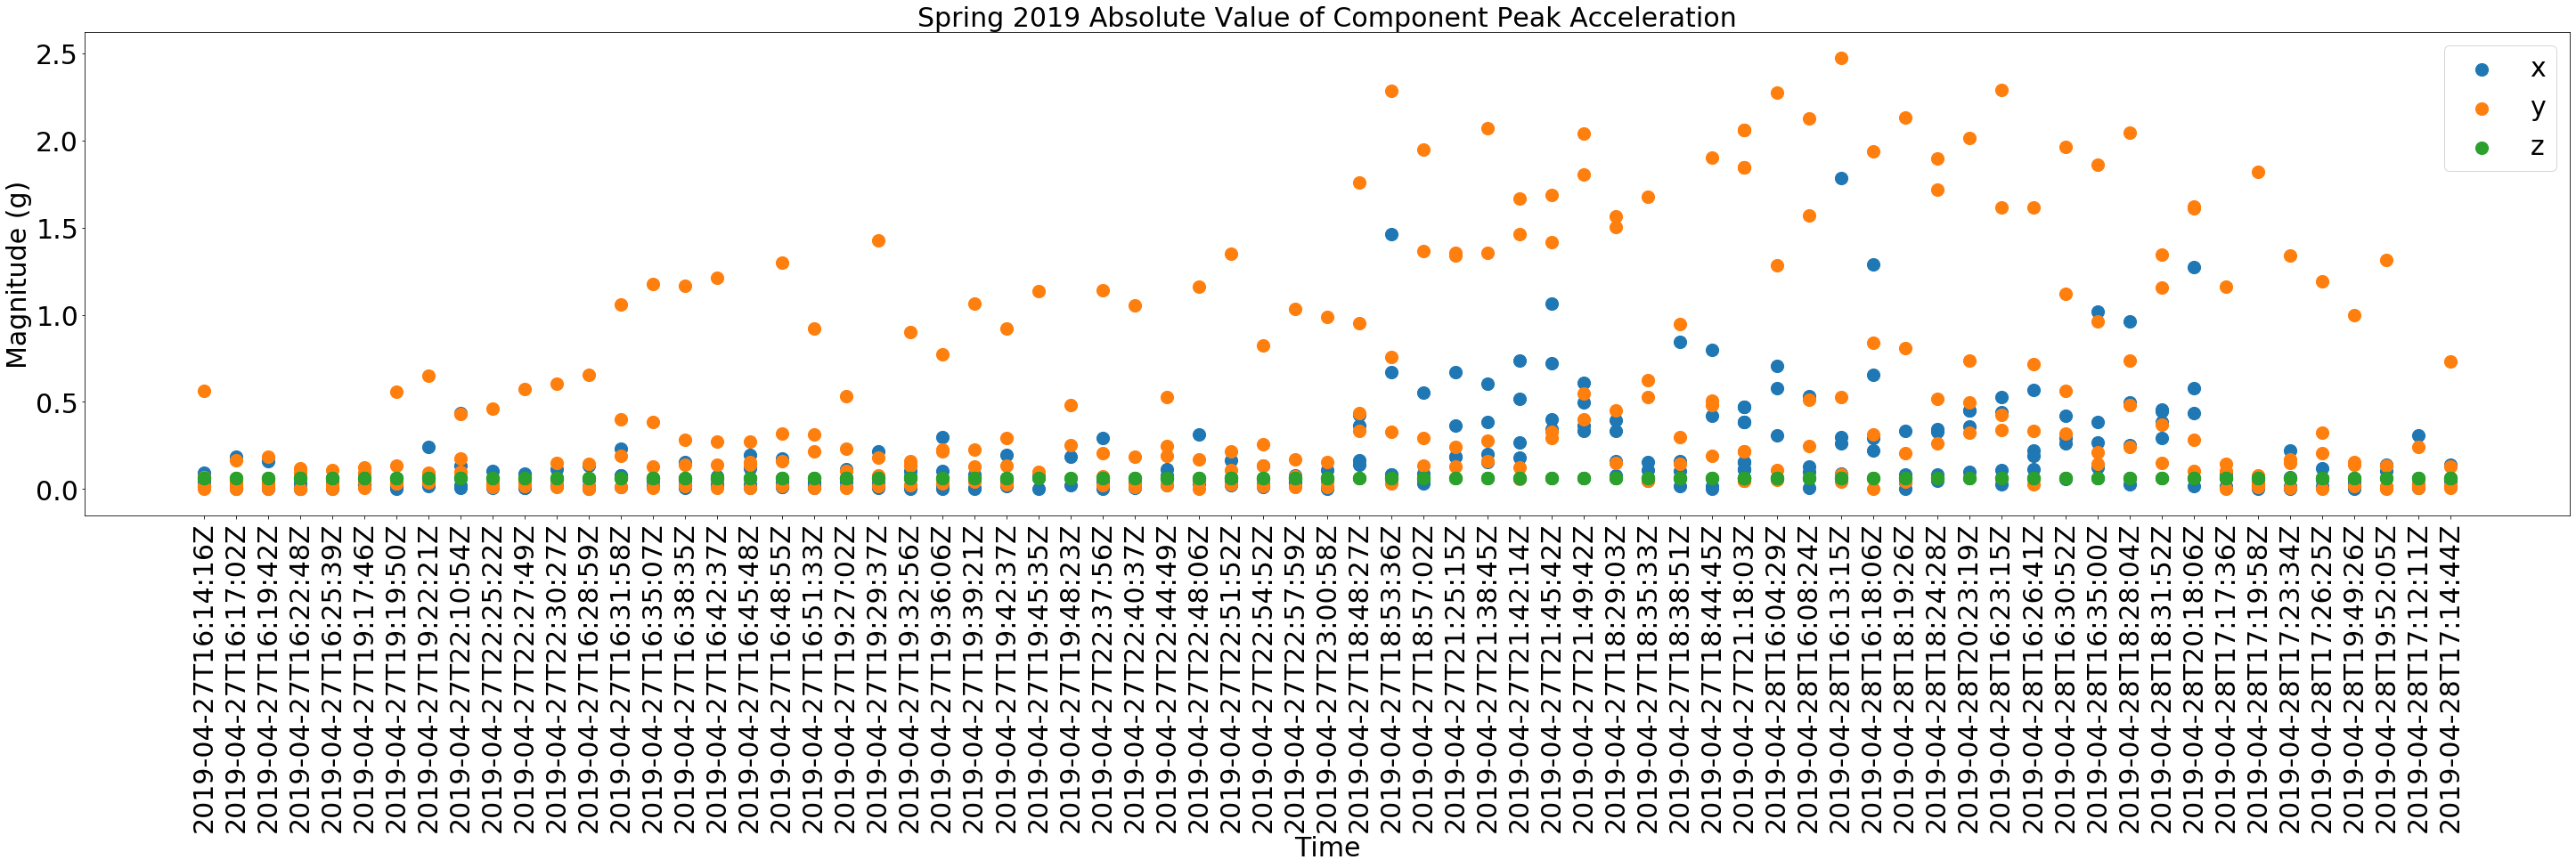

In [121]:
# Plot the absolute value scatter plot
print('what am I plotting? ', season)
# loop through values and make abs()
xValue_gabs = []
yValue_gabs = []
zValue_gabs = []

for x in xValue_g:
    xValue_gabs.append(abs(x))
for y in yValue_g:
    yValue_gabs.append(abs(y))
for z in zValue_g:
    zValue_gabs.append(abs(x))
    
# make figure
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
    
x = plt.scatter(startTimeFile, xValue_gabs, s = 200)
y = plt.scatter(startTimeFile, yValue_gabs, s = 200)
z = plt.scatter(startTimeFile, zValue_gabs, s = 200)


# Labels and Titles

plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Spring 2019 Absolute Value of Component Peak Acceleration", fontsize = 30)
#plt.title("Fall 2019 Absolute Value of Component Peak Acceleration", fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Magnitude (g)', fontsize = 30)
plt.gca().legend(('x','y','z'), fontsize = 30)

    
#Save the Figure

plt.savefig('./springClean/Magnitude/sp_scatter_abs.png', bbox_inches='tight')
#plt.savefig('./fallClean/Magnitude/fa_scatter_abs.png', bbox_inches='tight')

plt.show()

In [46]:
## Make a nested list of Time, Station Index, and Station Name
# Easier to parse days and pick hours to plot. 
print('what am I plotting? ', season)

import dateutil.parser
#print(maxVmagTime)

timesFormat = []
for times in maxVmagTime:
    timesFormat.append(dateutil.parser.parse(times))

frivmagTime=[]
friSta = []
friStaIndex = []

#fri2vmagTime=[]
#fri2Sta = []
#fri2StaIndex = []

satvmagTime=[]
satSta = []
satStaIndex = []

for idx in range(len(sta)):
    if (timesFormat[idx].hour == 21) and (timesFormat[idx].minute == 21): #or (timesFormat[idx].hour == 22):
        frivmagTime.append(timesFormat[idx])
        friSta.append(sta[idx])
        friStaIndex.append(staIndex[idx])
        #print(timesFormat[idx])
    #elif timesFormat[idx].hour == 0:
        #fri2vmagTime.append(timesFormat[idx])
        #fri2Sta.append(sta[idx])
        #fri2StaIndex.append(staIndex[idx])
    else:
        satvmagTime.append(timesFormat[idx])
        satSta.append(sta[idx])
        satStaIndex.append(staIndex[idx])
        
  


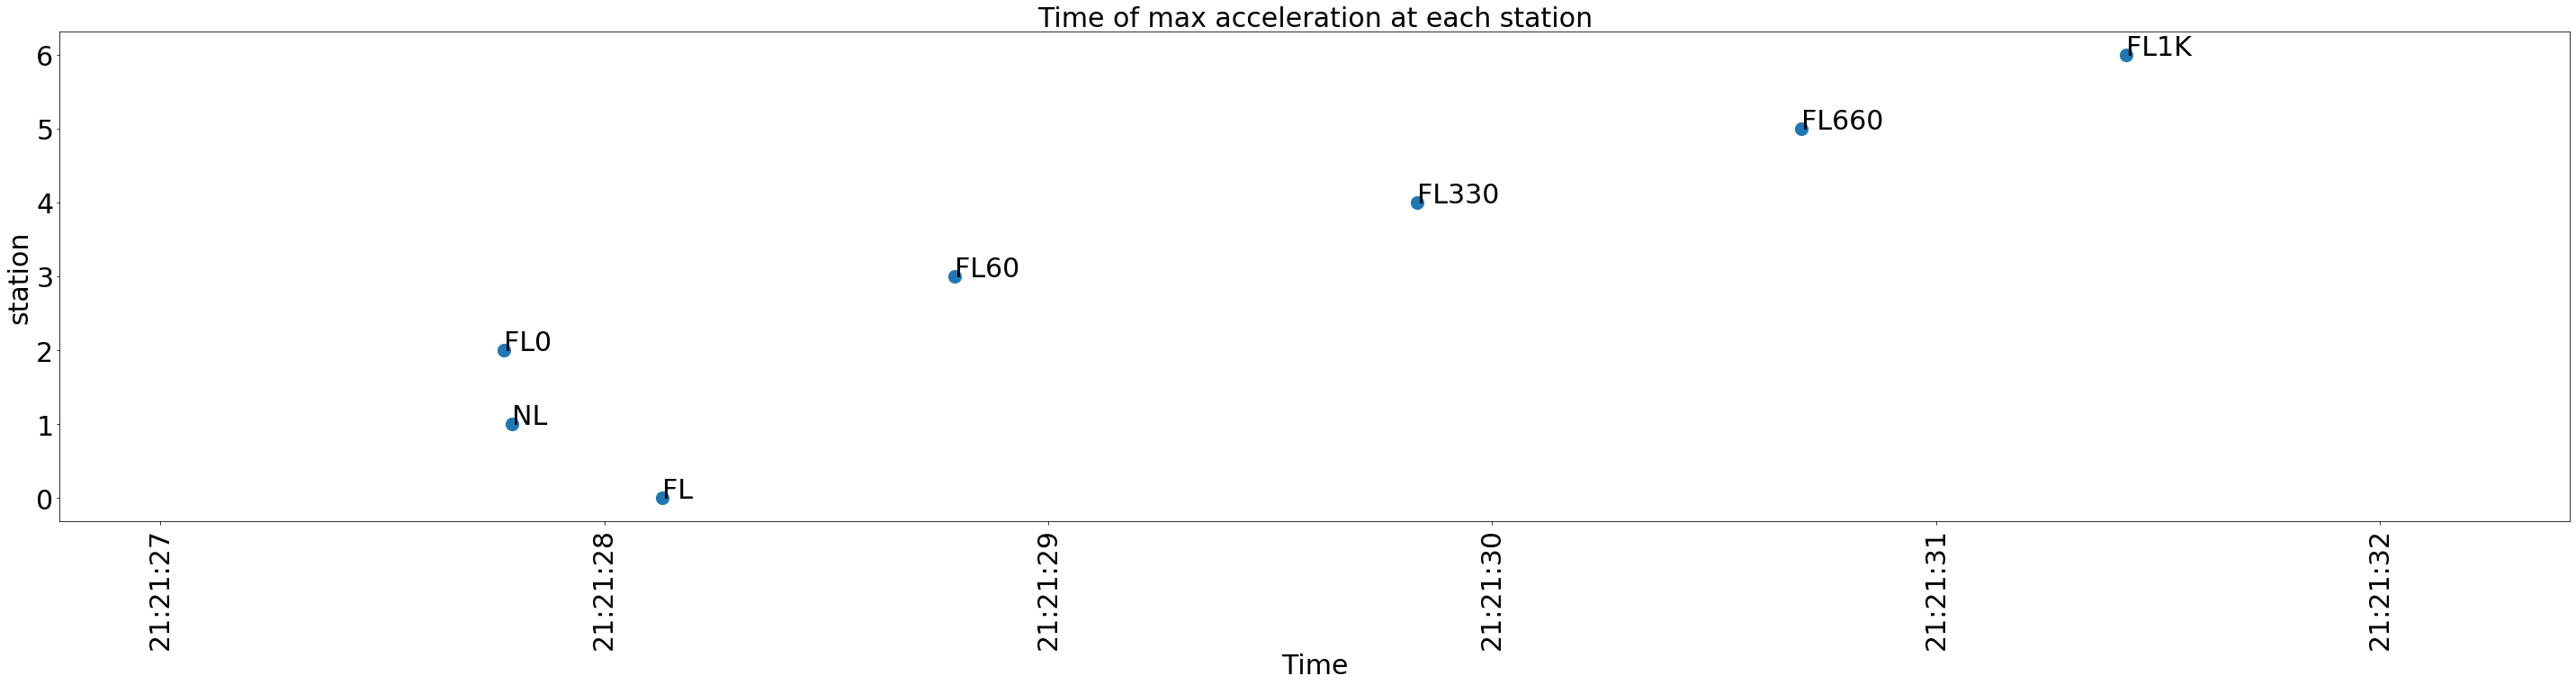

In [70]:
# plot 'Fridays'
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)

#print(sorted(frivmagTime), 'frivmagTime')

#print(friStaIndex,'friStaIndex')
#print(friSta,'friSta')


friPlot = plt.scatter(frivmagTime,friStaIndex, s = 200) 

for i, txt in enumerate(friSta):
    plt.annotate(txt, (frivmagTime[i], friStaIndex[i]), fontsize = 30)
plt.title('Time of max acceleration at each station', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('station', fontsize = 30)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
ax.set_xlim([min(frivmagTime) - timedelta(seconds = 1), max(frivmagTime) + timedelta(seconds = 1)])


plt.savefig('./fallClean/Magnitude/fa_temp_fig.png', bbox_inches='tight')

plt.show()

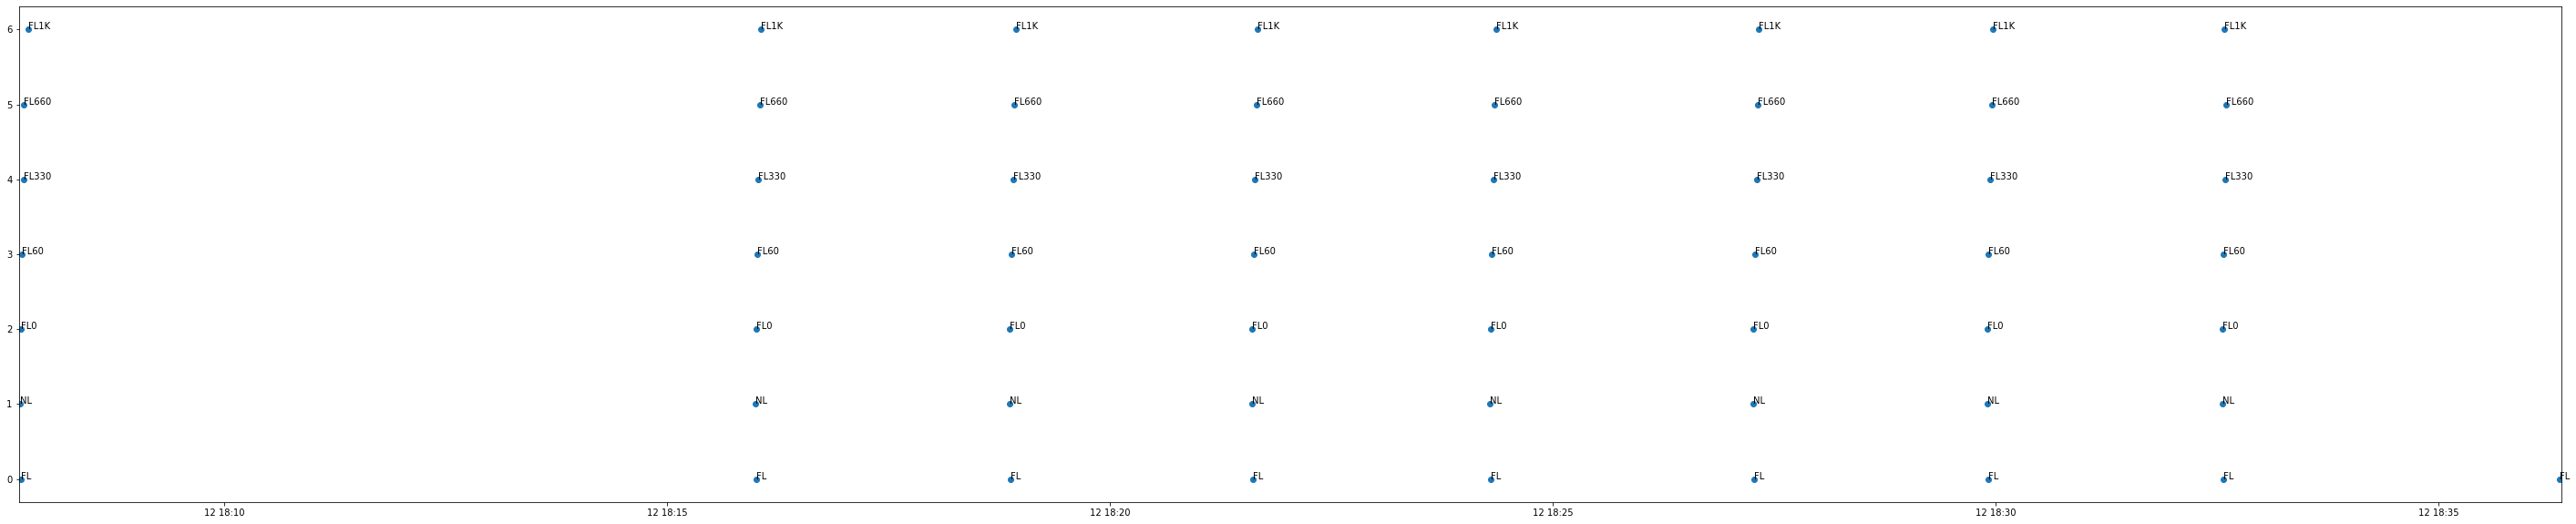

In [17]:
# Plot 'Saturday'   
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)

satPlot = plt.scatter(satvmagTime,satStaIndex) 
for i, txt in enumerate(satSta):
    plt.annotate(txt, (satvmagTime[i], satStaIndex[i]))
#plt.title("Friday")
#plt.xlabel('Time')
#plt.ylabel('station')
#plt.xticks(rotation=90)
ax.set_xlim([min(satvmagTime) - timedelta(seconds = 1), max(satvmagTime) + timedelta(seconds = 1)])
plt.show()
